In [1]:
# Objective:
# The dataset contains information on weather conditions
# recorded on each day at various weather stations around the world. 
# Information includes precipitation, snowfall, temperatures, wind speed and 
# whether the day included thunderstorms or other poor weather conditions.

# So our task is to predict the maximum temperature taking input feature as minimum temperature.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics 



In [2]:
df=pd.read_csv("Weather.csv")
df.head(10)
df.shape
df.describe()

C:\Users\Srujana\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


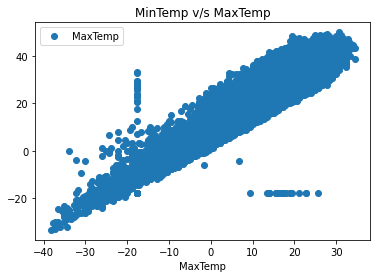

In [3]:
df.plot(x="MinTemp",y="MaxTemp",style='o')
plt.title("MinTemp v/s MaxTemp")
plt.xlabel('MinTemp')
plt.xlabel('MaxTemp')
plt.show()



In [4]:
# Our next step is to divide the data into “attributes” and “labels”.

# Attributes are the independent variables while labels are dependent variables
# whose values are to be predicted. In our dataset, we only have two columns.
# We want to predict the MaxTemp depending upon the MinTemp recorded.
# Therefore our attribute set will consist of the “MinTemp” column
# which is stored in the X variable, and the label will be the “MaxTemp” column
# which is stored in y variable.


X=df['MinTemp'].values.reshape(-1,1)
y=df['MaxTemp'].values.reshape(-1,1)

print(X)
print("-------------------")
print(y)



[[22.22222222]
 [21.66666667]
 [22.22222222]
 ...
 [18.33333333]
 [18.33333333]
 [17.22222222]]
-------------------
[[25.55555556]
 [28.88888889]
 [26.11111111]
 ...
 [28.33333333]
 [28.33333333]
 [29.44444444]]


In [5]:
# Next, we split 80% of the data to the training set while 20% of the data to test set
#using below code.

# The test_size variable is where we actually specify the proportion of the test set.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

# Printing the shapes of the new X objects  
print(X_train.shape)
print(X_test.shape)

# Printing the shapes of the new  y objects  
print(y_train.shape)
print(y_test.shape)

(95232, 1)
(23808, 1)
(95232, 1)
(23808, 1)


In [6]:
# After splitting the data into training and testing sets,
# finally, the time is to train our algorithm. 
# For that, we need to import LinearRegression class, instantiate it,
# and call the fit() method along with our training data.

reg=LinearRegression()      
reg.fit(X_train,y_train)     #Traning the algorithm 


LinearRegression()

In [7]:
#  the linear regression model basically finds the best value for the intercept and slope,
#     which results in a line that best fits the data. 
#     To see the value of the intercept and slop calculated by the linear regression algorithm
#     for our dataset, execute the following methods:


print("The intercept:",reg.intercept_)   #to retrive intercept
print("The Slope:",reg.coef_)            #to retrive the coefficient or slope 


# The result should be approximately 10.66185201 and 0.92033997 respectively.

# This means that for every one unit of change in Min temperature,
# the change in the Max temperature is about 0.92%.

The intercept: [10.66379122]
The Slope: [[0.92074426]]


In [8]:
# Predicting using test data 

# we will use our test data and see how accurately our algorithm predicts the percentage score.
# To make predictions on the test data, execute the following command:

y_pred=reg.predict(X_test)
print(y_pred)


[[20.89428299]
 [28.56715181]
 [31.63629934]
 ...
 [15.7790371 ]
 [31.12477475]
 [24.47495511]]


In [9]:
# Now comparing actual values with prediction values 

df=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
df.head(10)

,Actual,Predicted
0,29.444444,20.894283
1,32.777778,28.567152
2,37.222222,31.636299
3,33.333333,30.613250
4,30.000000,32.147824
5,31.111111,30.101726
6,4.444444,5.037021
7,9.444444,14.755988
8,28.888889,33.682398
9,23.333333,22.428857


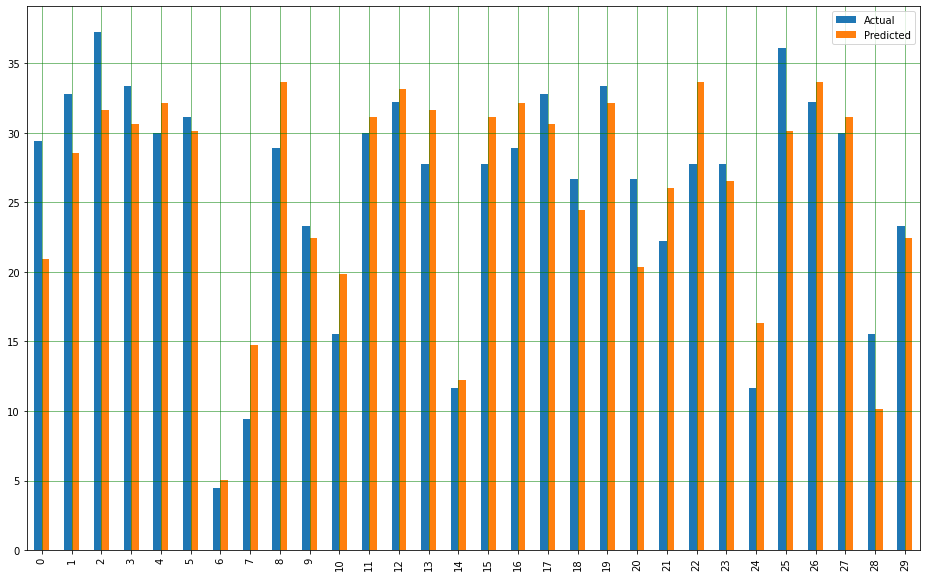

In [10]:
# visualizing the comparision result using bar garph 

df1=df.head(30)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle="-",linewidth='0.5',color='g')
plt.grid(which='minor',linestyle=":",linewidth='0.5',color='r')
plt.show()


# Though our model is not very precise,
# the predicted percentages are close to the actual ones.

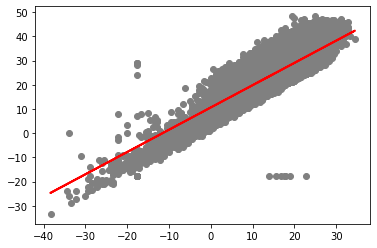

In [11]:
#  Plot our straight line with the test data 
plt.scatter(X_test,y_test,color="grey")
plt.plot(X_test,y_pred,color="red",linewidth=2)
plt.show()

# The straight line in the above graph shows our algorithm is correct.

In [12]:
# Evaluation
# The final step is to evaluate the performance of the algorithm. 
# This step is particularly important to compare how well different algorithms
# perform on a particular dataset.
# For regression algorithms, three evaluation metrics are commonly used:

# Mean Absolute error(MAE)
# Mean Squared error(MSE)
# Root Mean Squared error(RMSE)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.199384317831732
Mean Squared Error: 17.611507940032364
Root Mean Squared Error: 4.196606717341091


# Calculating R2 score 


In [13]:
R2_score=reg.score(X,y)
print(R2_score)

# r2 value should be nearer to 1



0.7715546995674625


# Ordinary least square method(OLS method)

In [21]:
import scipy.stats as stats
import statsmodels.api as sm

X=df['MinTemp']
y=df['MaxTemp']

X=sm.add_constant(X)
model=sm.OLS(y,X).fit()   #sm.OLS takes parameters in inverted order 
print(model.summary())




# import scipy.stats as stats
# import statsmodels.api as sm

# X = df["MinTemp"]
# y = df["MaxTemp"]
# X = sm.add_constant(X)
# model = sm.OLS(y, X).fit() # sm.OLS take paramteres in inverted order
# print(model.summary())


import statsmodels as sm

ols=sm.api.OLS
model=ols(y_train,X_train)
result=model.fit(x=X_train,y=y_train)
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                          1.937e+06
Date:                Mon, 23 Nov 2020   Prob (F-statistic):                        0.00
Time:                        12:13:10   Log-Likelihood:                     -3.0813e+05
No. Observations:               95232   AIC:                                  6.163e+05
Df Residuals:                   95231   BIC:                                  6.163e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [12]:
# # task
# import sklearn
# print("scikit version:-",sklearn.__version__)

# print(df)
# print(type(df))
# X=df.MinTemp
# y=df.MaxTemp

# #Storing the feature and target names
# feature_names=df.MinTemp
# target_names=df.MaxTemp

# #Printing the feature and target names
# print("feature names:",feature_names)
# print("target names:",target_names)

# print(df.MinTemp.shape)

# print("printing first five rows:-",X[:5])


# # splitting X and y into training and testing sets 

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# # Printing the shapes of the new X objects  
# print(X_train.shape)
# print(X_test.shape)

# # Printing the shapes of the new  y objects  
# print(y_train.shape)
# print(y_test.shape)

scikit version:- 0.23.2
